# LAB 8 - Week 11

This lab will strengthen your ability to translate theoretical knowledge into a practical application, where you'll need to select, implement, and optimize various machine learning approaches to solve business problems. In this lab you will be using carefully selected datasets that mirror actual retail data structures. Using the complete machine learning workflow—from exploratory data analysis and preprocessing to model implementation, evaluation, and result interpretation. 

Scenario

As a junior data scientist at DataVine Analytics, you've been assigned to work with a boutique consulting group that specializes in diverse industry applications of machine learning. Your team serves clients across several sectors, and you've been tasked with developing prototype machine learning solutions using standardized datasets that mirror real-world problems.

Your supervisor has outlined three specific client projects that will test your ability to implement classification, recommendation, and clustering techniques while applying dimensionality reduction and hyper-parameter tuning:

# Wine Classification System

A premium wine distributor needs to automatically classify wines based on their chemical properties for inventory management and quality control.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Business Goal

A premium wine distributor is seeking to enhance its inventory management and quality control processes by implementing an automated system that can accurately classify wines into distinct varieties using their chemical compositions. Manual identification is costly, inconsistent, and not scalable — the company needs a reliable machine learning solution to streamline operations, support sourcing decisions, and ensure consistency in labeling and quality assurance.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Target Variable

The dataset includes a column called target, which encodes the wine variety as a categorical class (e.g., 0, 1, 2). This is the dependent variable we aim to predict.

Each row in the dataset represents a wine sample, and the target label reflects its true varietal classification, based on expert tasting or lab validation. By learning the relationship between this label and 13 chemical features (such as alcohol content, color intensity, proline levels), we can build a classification model to automatically predict the wine’s variety.

This aligns directly with the business goal: by predicting wine types from lab data, the distributor gains fast, objective, and scalable inventory classification capabilities.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Strategic Advantages

Regulatory Alignment: Some markets require standardized labeling based on measurable chemical attributes. A model-driven classification system supports compliance.

Scalability: Once deployed, the model can analyze thousands of samples at minimal cost, enabling growth without expanding labor costs.

Data-Driven Decisions: The approach provides traceability and quantification — essential for future analytics, trend detection, and varietal profiling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

## 1.- Load and prepare Datasets

### Inspect the data for missing values and handle inconsistencies.

In [2]:
df_wine = pd.read_csv('wine_data.csv')

In [3]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df_wine.shape

(178, 14)

In [5]:
df_wine.count()

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
target                          178
dtype: int64

In [6]:
# Unique Vallues in target >> There ae 3 kinds of wine
df_wine["target"].unique()

array([0, 1, 2], dtype=int64)

In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:
# Check duplicates / No duplicates
df_wine[df_wine.duplicated()].shape[0]

0

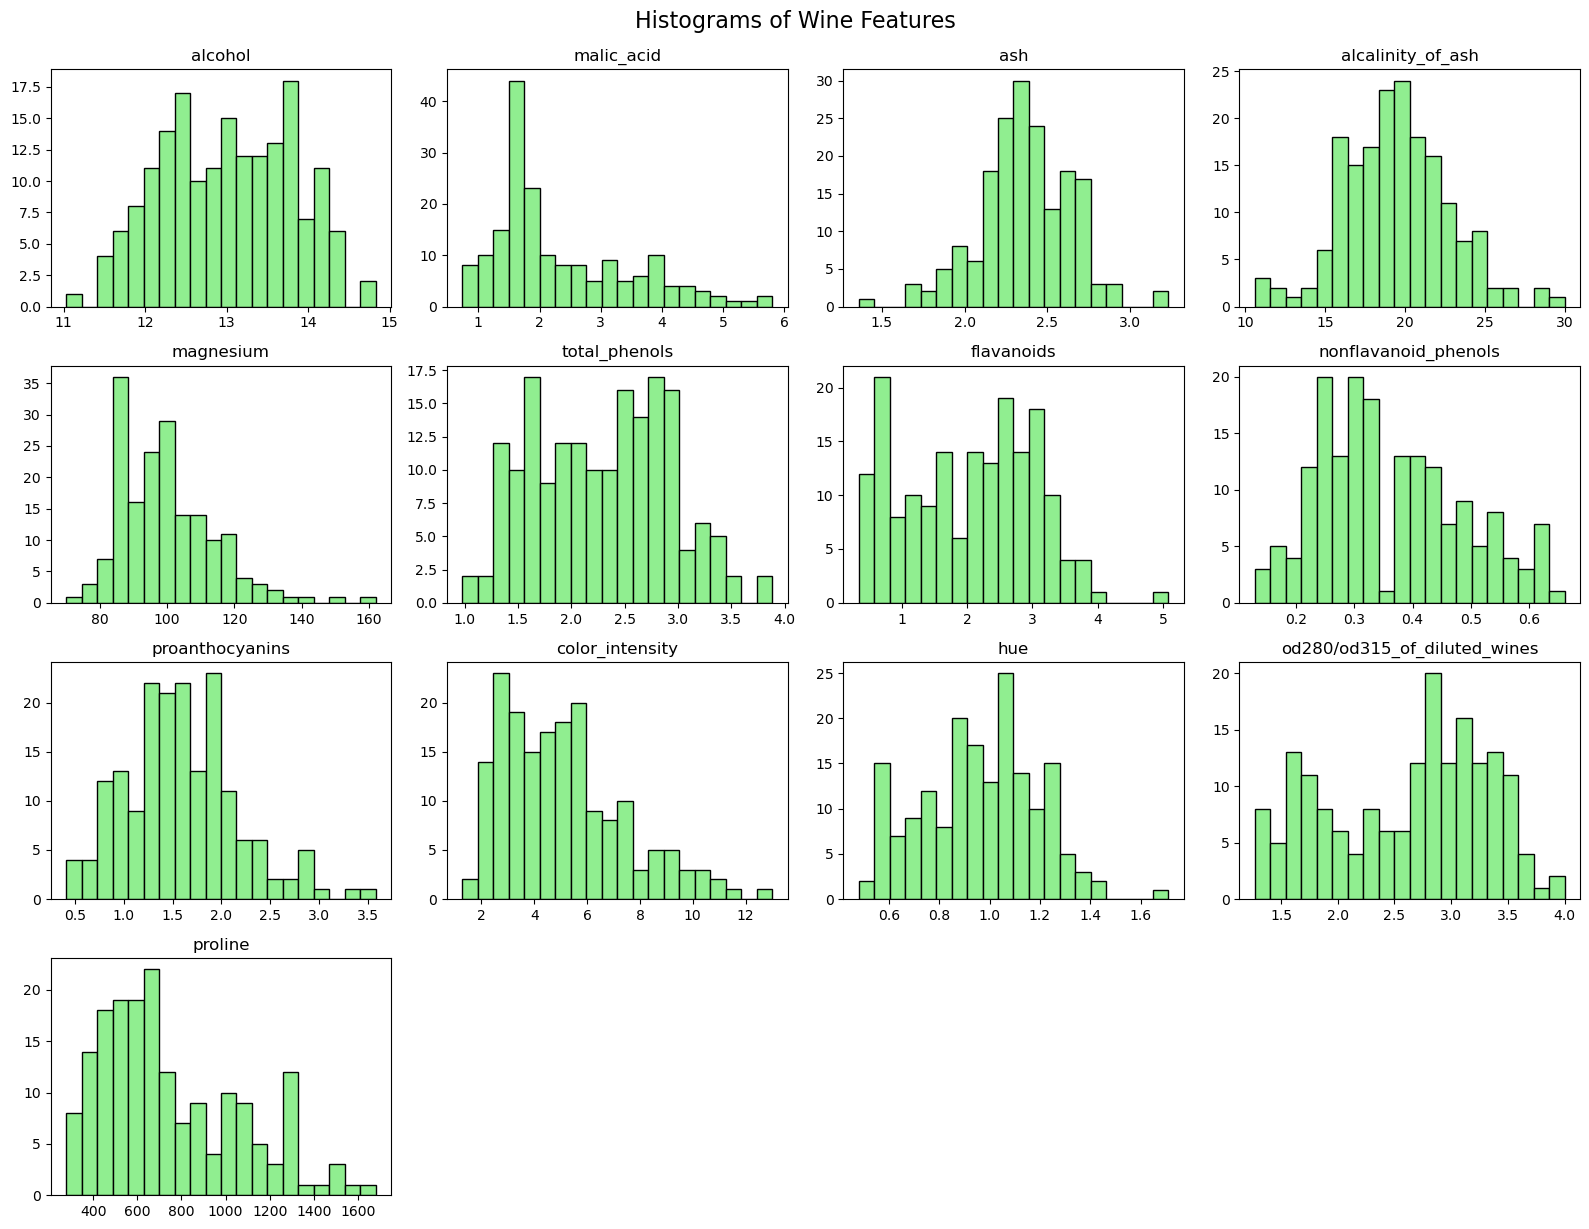

In [11]:
# Visual inspection
# Histograms to detect outliers

# Drop my target
num_features = df_wine.drop(columns=["target"]).shape[1]
n_cols = 4
n_rows = (num_features + n_cols - 1) // n_cols
plt.figure(figsize=(16, n_rows * 3))

# Plot histogram for each feature
for i, col in enumerate(df_wine.drop(columns=["target"]).columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_wine[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Histograms of Wine Features", fontsize=16, y=1.02)
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

The histograms show some skew (e.g., proline, color_intensity) but nothing that looks like data-entry errors or values far outside plausible chemical ranges. A StandardScaler (mean = 0, σ = 1) is appropriate and will keep any moderate extremes from dominating the distance calculations in k-NN or the variance structure in PCA.

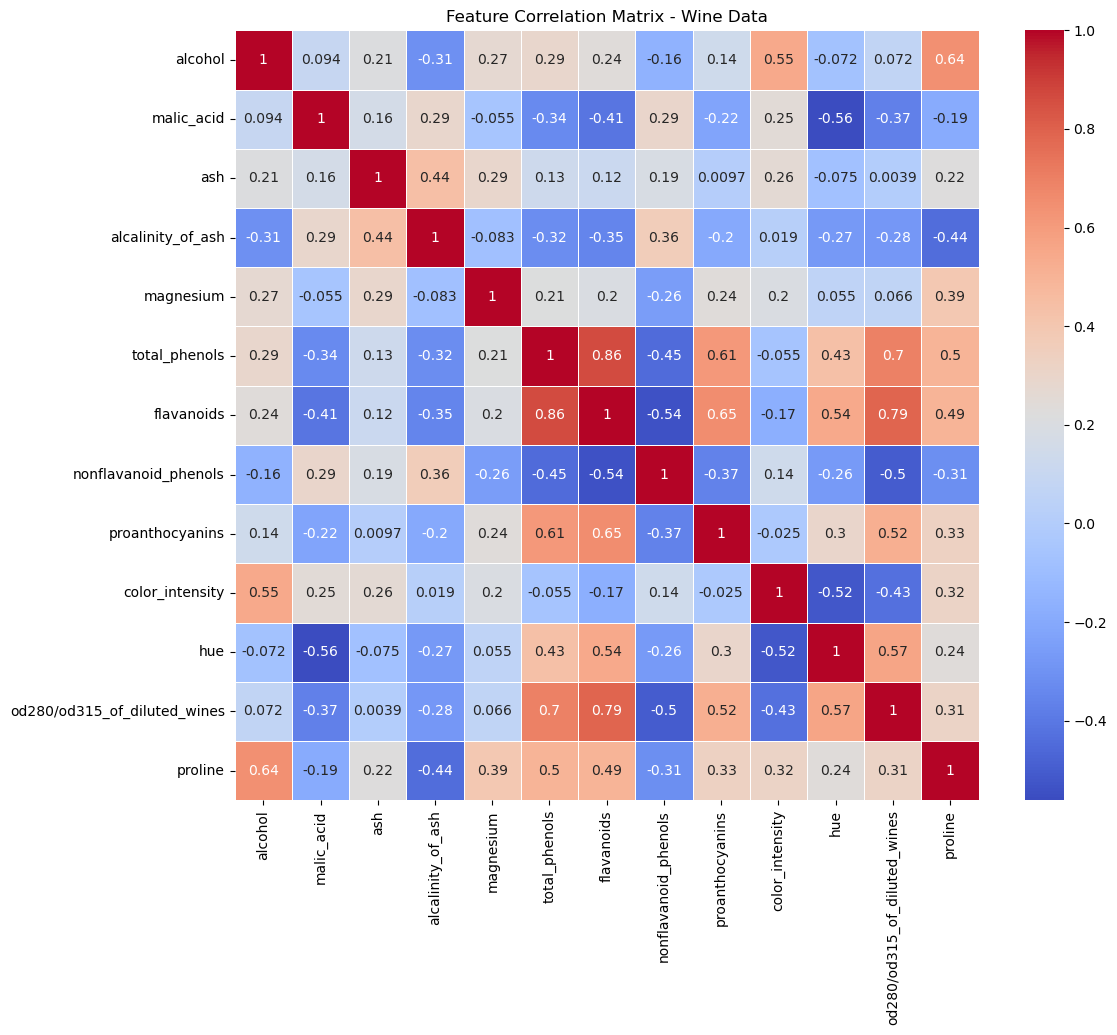

In [37]:
# Heatmap for correlation of the 13 variables

# Drop target column. it is not continuous and it would misrepresent
features = df_wine.drop(columns=["target"])

# Compute correlation matrix
correlation_matrix = features.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix - Wine Data')
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

Heatmap observations:

Several features are strongly correlated, suggesting redundancy: total_phenols vs flavanoids (0.86), od280/od315_of_diluted_wines vs flavanoids (0.79) and color_intensity vs proline (0.64)

A few features show weak or negative correlations, such as: malic_acid vs flavanoids (-0.41) and hue vs malic_acid (-0.56)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Model Chosen: k-Nearest Neighbors**

We aim to build a reliable classification model that predicts wine varieties based on their chemical features. The chosen model is k-Nearest Neighbors (k-NN), a distance-based algorithm that assumes all features contribute equally to measuring similarity.

k-NN is a non-parametric, instance-based learning method, it makes predictions by comparing new samples to stored examples — no need to learn complex internal parameters. This approach is easy to explain to business stakeholders: “We classify a wine based on how similar it is to others we’ve already labeled.” k-NN also works well with small datasets (178 rows and 13 features).

### Standardize numerical features to improve model performance.

In [13]:
# Prepare features (X) and target (y)
X = df_wine.drop(columns=["target"])
y = df_wine["target"]

In [14]:
# Splitting the data into training and testing sets (80-20 split and random_state of 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled.shape

(142, 13)

In [17]:
X_test_scaled.shape

(36, 13)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Summarize the datasets to confirm their structure.**

The df_wine dataset was successfully loaded and inspected to confirm its readiness for machine learning applications. It contains 178 observations and 14 columns — 13 numerical features representing chemical properties of wine samples and one target column (target) indicating the wine variety class. All features are of numeric type (float64 or int64), and no missing values or duplicates were found. Basic statistical summaries and histograms confirmed the presence of natural variability without extreme outliers or invalid entries. Numerical features were then standardized using StandardScaler to ensure consistent scaling for distance-based modeling. These steps confirm that the dataset is clean, structured correctly, and suitable for further processing such as dimensionality reduction and classification modeling.

## k-Nearest Neighbors (k-NN) Classification on the Wine Dataset

### Use PCA and hyperparameter tuning to optimize k-NN classification.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**2.1 Convert categorical target labels into numeric values.**

No conversion needed. The target column in the wine dataset is already numeric, it contains integer labels like 0, 1, and 2 to represent the wine classes and it was confirmed running the code df_wine["target"].unique() during EDA

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**2.2 Apply PCA to reduce dimensionality while retaining 95% variance.**

PCA will transform the data, It creates uncorrelated linear combinations (principal components) of the original features. These components live in a new coordinate space, often with fewer dimensions.

Before applying PCA, we explored the 13 chemical features in the wine dataset using histograms and a correlation heatmap. The histograms confirmed that most variables were continuous with some skew, while the heatmap revealed that several features were strongly correlated — such as total_phenols and flavanoids, or color_intensity and proline.

These correlations indicate redundant information in the feature space. This redundancy can negatively affect distance-based models like k-Nearest Neighbors (k-NN), which assume that all features contribute independently to similarity measurements. PCA (Principal Component Analysis) addresses this issue by transforming the correlated features into a smaller number of uncorrelated principal components that retain most of the data's variance.

By applying PCA and retaining 95% of the variance, we reduce the dimensionality from 13 to 10 components, improving model efficiency while preserving the essential patterns needed for classification.

Once the PCA is ready, we can calculate distance metrics: Euclidean, Manhattan and Chebyshev. On raw features (with skew or multicollinearity), distance metrics can be misleading but on PCA-transformed data, distances are measured on orthogonal axes and are more meaningful.

In [18]:
# Initialize PCA without restricting the number of components
pca = PCA(n_components=0.95, random_state=42)

In [19]:
# Fit PCA model to scaled and transform data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [20]:
explained_variance_ratio = pca.explained_variance_ratio_

In [21]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [22]:
eigenvalues = pca.explained_variance_

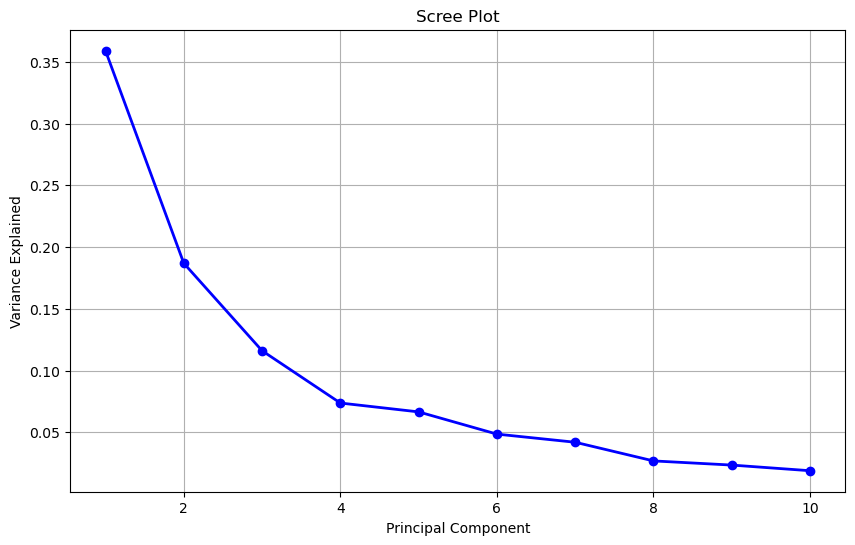

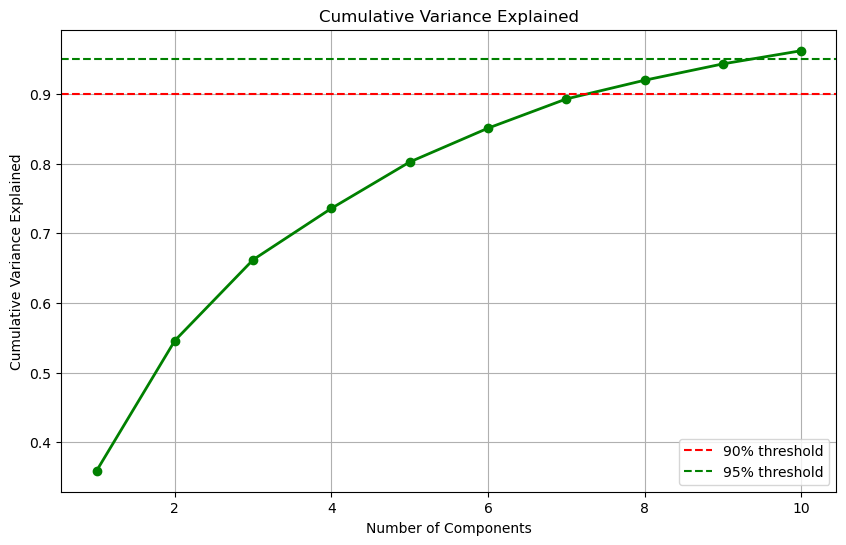

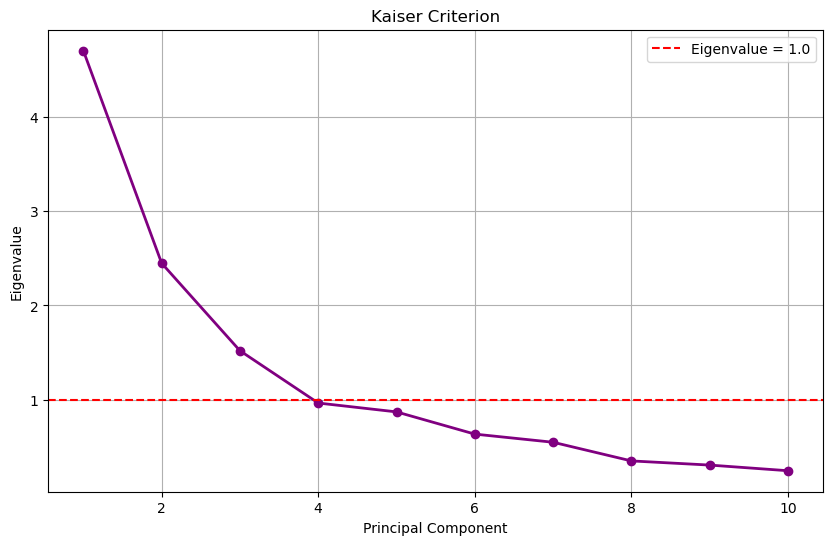

In [23]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
         'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Cumulative Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         'o-', linewidth=2, color='green')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

# Kaiser Criterion Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 
         'o-', linewidth=2, color='purple')
plt.axhline(y=1.0, color='r', linestyle='--', label='Eigenvalue = 1.0')
plt.title('Kaiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

1. Scree Plot
The first 2–3 components explain the largest portion of variance, with diminishing returns after that. There's a noticeable “elbow” at component 3, suggesting that beyond this point, additional components contribute less meaningfully.

2. Cumulative Variance Plot
The first 10 principal components retain over 95% of the total variance, confirming that dimensionality can be reduced from 13 original features to just 10 components without significant information loss. This aligns with your use of n_components=0.95 in PCA, which balances efficiency and information retention.

3. Kaiser Criterion Plot
Based on the Kaiser rule (eigenvalues > 1), only the first 3 or 4 components are statistically strong. This supports the idea that the first few PCs capture most of the structural variance in the dataset.

4. PCA optimal for keeping 95% of the variance is PCA(n_components=10)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**2.3 Use GridSearchCV to find the optimal k-value and distance metric.**

With the PCA ready, we can calculate distance metrics: Euclidean, Manhattan and Chebyshev and optimize with gridSearchCV. 

On raw features (with skew or multicollinearity), distance metrics can be misleading but on PCA-transformed data, distances are measured on orthogonal axes and are more meaningful.

To optimize the k-NN classifier, the hyperparameter n_neighbors is tested over the range 3 to 15. This range was selected based on best practices in model tuning and the characteristics of the dataset. Very small values of k (e.g., k=1) tend to overfit the training data by making predictions overly sensitive to noise, while large values of k (e.g., above 15) risk underfitting by oversmoothing decision boundaries. The chosen range balances bias and variance, allowing the model to capture meaningful local patterns without being too sensitive or too general.

In [36]:
# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(3, 16)),                  # Try k values from 3 to 15
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Distance metrics
    'weights': ['uniform', 'distance']                  # Weighting schemes
}

In [25]:
# Initialize k-NN model
knn = KNeighborsClassifier()

In [26]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    n_jobs=-1
)

In [27]:
# Fit GridSearchCV on PCA-transformed training data
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [28]:
# Best parameters
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [29]:
# Best Score
grid_search.best_score_

0.9716748768472907

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**2.4 Train the k-NN classifier using the best parameters.**

In [30]:
# Train final model with best parameters from GridSearchCV
best_knn = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['n_neighbors'],
    metric=grid_search.best_params_['metric'],
    weights=grid_search.best_params_['weights']
)

In [31]:
best_knn.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [32]:
y_pred = best_knn.predict(X_test_pca)

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**2.5 Evaluate the model with a classification report and accuracy score.**

I included the Confusion matrix

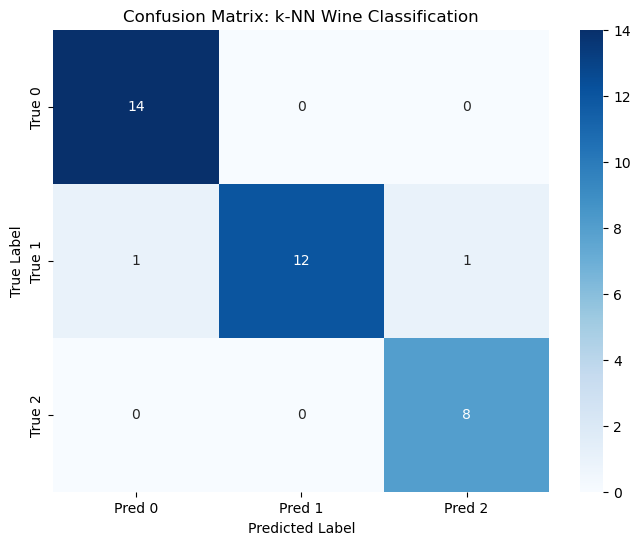

In [33]:
# confusion matrix to take a look to the result
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap version
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Pred {i}' for i in sorted(y_test.unique())],
            yticklabels=[f'True {i}' for i in sorted(y_test.unique())])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: k-NN Wine Classification')
plt.show()

In [34]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [35]:
# Accuracy score
accuracy_score(y_test, y_pred)

0.9444444444444444

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Conclusions**

The optimized k-Nearest Neighbors (k-NN) model demonstrated strong classification performance on the wine dataset, achieving an overall accuracy of 94.4% on the test set. The classification report highlights consistent performance across all three wine classes:

- Class 0 achieved a perfect recall (1.00) and a high f1-score of 0.97, indicating excellent model precision and sensitivity.
- Class 1 had a perfect precision (1.00) and a recall of 0.86, suggesting it was slightly less often correctly identified but never misclassified as another class.
- Class 2 maintained high precision and recall (0.89 and 1.00, respectively), with a solid f1-score of 0.94.

The macro average f1-score is 0.94, indicating balanced performance across all classes, and the weighted average f1-score is also 0.94, confirming the model performs well even with class imbalance. These results validate that the model generalizes well and supports the business goal of accurately classifying wine varieties based on chemical features.